In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [2]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)
df.head()

,Sex,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 10), (836, 10), (3341,), (836,))

In [4]:
X_tr = X_tr.astype('float32')
# X_tr.info()
y_tr = y_tr.astype('float32')
X_te = X_te.astype('float32')
y_te = y_te.astype('float32')

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
X[:5]

array([[0.    , 0.    , 1.    , 0.455 , 0.365 , 0.095 , 0.514 , 0.2245,
        0.101 , 0.15  ],
       [0.    , 0.    , 1.    , 0.35  , 0.265 , 0.09  , 0.2255, 0.0995,
        0.0485, 0.07  ],
       [1.    , 0.    , 0.    , 0.53  , 0.42  , 0.135 , 0.677 , 0.2565,
        0.1415, 0.21  ],
       [0.    , 0.    , 1.    , 0.44  , 0.365 , 0.125 , 0.516 , 0.2155,
        0.114 , 0.155 ],
       [0.    , 1.    , 0.    , 0.33  , 0.255 , 0.08  , 0.205 , 0.0895,
        0.0395, 0.055 ]])

## model 2 from FFNN_01

In [10]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Flatten())
model.add(Dense(1))

In [83]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [84]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 248us/sample - loss: 91.9383 - mse: 91.9383 - val_loss: 58.6622 - val_mse: 58.6622
Epoch 2/100
2672/2672 [==============================] - 0s 48us/sample - loss: 29.3412 - mse: 29.3412 - val_loss: 13.4319 - val_mse: 13.4319
Epoch 3/100
2672/2672 [==============================] - 0s 39us/sample - loss: 11.8317 - mse: 11.8317 - val_loss: 9.3785 - val_mse: 9.3785
Epoch 4/100
2672/2672 [==============================] - 0s 46us/sample - loss: 8.9401 - mse: 8.9401 - val_loss: 7.1965 - val_mse: 7.1965
Epoch 5/100
2672/2672 [==============================] - 0s 36us/sample - loss: 7.7218 - mse: 7.7218 - val_loss: 6.3351 - val_mse: 6.3351
Epoch 6/100
2672/2672 [==============================] - 0s 41us/sample - loss: 6.9780 - mse: 6.9780 - val_loss: 5.9475 - val_mse: 5.9475
Epoch 7/100
2672/2672 [==============================] - 0s 45us/sample - loss: 6.5784 - mse: 6.5784 - val_loss: 5

In [85]:
y_pred = model.predict(X_te)

In [86]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [87]:
score

[4.757182445252341, 4.757182]

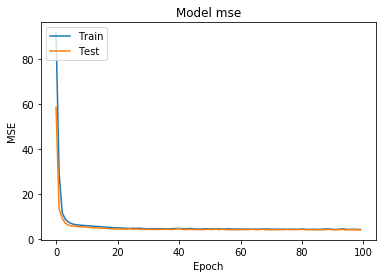

In [88]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 3-1 change dimension

In [7]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Flatten())
model.add(Dense(1))

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [10]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 345us/sample - loss: 87.0721 - mae: 8.7853 - val_loss: 53.5270 - val_mae: 6.8106
Epoch 2/100
2672/2672 [==============================] - 0s 38us/sample - loss: 25.4866 - mae: 4.0487 - val_loss: 10.9501 - val_mae: 2.5569
Epoch 3/100
2672/2672 [==============================] - 0s 37us/sample - loss: 10.0236 - mae: 2.3511 - val_loss: 7.4657 - val_mae: 1.8640
Epoch 4/100
2672/2672 [==============================] - 0s 34us/sample - loss: 8.0264 - mae: 2.0526 - val_loss: 6.3594 - val_mae: 1.8211
Epoch 5/100
2672/2672 [==============================] - 0s 37us/sample - loss: 7.2321 - mae: 1.9292 - val_loss: 6.0045 - val_mae: 1.7613
Epoch 6/100
2672/2672 [==============================] - 0s 38us/sample - loss: 6.8121 - mae: 1.8902 - val_loss: 5.7897 - val_mae: 1.7142
Epoch 7/100
2672/2672 [==============================] - 0s 35us/sample - loss: 6.5593 - mae: 1.8658 - val_loss: 5.6645

2672/2672 [==============================] - 0s 37us/sample - loss: 4.4432 - mae: 1.4880 - val_loss: 4.2801 - val_mae: 1.4480
Epoch 60/100
2672/2672 [==============================] - 0s 27us/sample - loss: 4.4158 - mae: 1.4886 - val_loss: 4.1714 - val_mae: 1.4361
Epoch 61/100
2672/2672 [==============================] - 0s 31us/sample - loss: 4.4776 - mae: 1.4902 - val_loss: 4.3323 - val_mae: 1.5079
Epoch 62/100
2672/2672 [==============================] - 0s 36us/sample - loss: 4.4140 - mae: 1.4786 - val_loss: 4.2219 - val_mae: 1.4506
Epoch 63/100
2672/2672 [==============================] - 0s 35us/sample - loss: 4.4042 - mae: 1.4904 - val_loss: 4.3525 - val_mae: 1.4330
Epoch 64/100
2672/2672 [==============================] - 0s 36us/sample - loss: 4.4191 - mae: 1.4805 - val_loss: 4.2155 - val_mae: 1.4642
Epoch 65/100
2672/2672 [==============================] - 0s 36us/sample - loss: 4.4024 - mae: 1.4827 - val_loss: 4.2122 - val_mae: 1.4479
Epoch 66/100
2672/2672 [================

In [11]:
y_pred = model.predict(X_te)

In [12]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
score

[4.837062326914956, 1.5148158]

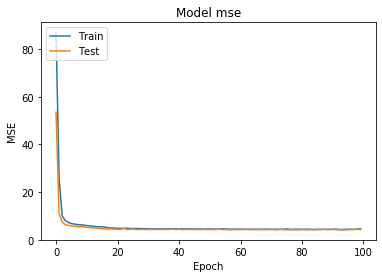

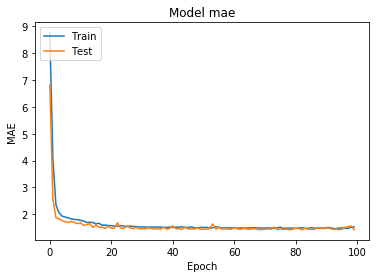

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 3-2 change filter

In [15]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Flatten())
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 325us/sample - loss: 98.9676 - mae: 9.4281 - val_loss: 82.9808 - val_mae: 8.5945
Epoch 2/100
2672/2672 [==============================] - 0s 39us/sample - loss: 69.8924 - mae: 7.7647 - val_loss: 42.6874 - val_mae: 5.9094
Epoch 3/100
2672/2672 [==============================] - 0s 33us/sample - loss: 22.7805 - mae: 3.7316 - val_loss: 8.5997 - val_mae: 2.1612
Epoch 4/100
2672/2672 [==============================] - 0s 31us/sample - loss: 10.2110 - mae: 2.4592 - val_loss: 7.7103 - val_mae: 1.9608
Epoch 5/100
2672/2672 [==============================] - 0s 37us/sample - loss: 8.7447 - mae: 2.0906 - val_loss: 7.2157 - val_mae: 1.9046
Epoch 6/100
2672/2672 [==============================] - 0s 35us/sample - loss: 8.2469 - mae: 2.0880 - val_loss: 6.8463 - val_mae: 1.8661
Epoch 7/100
2672/2672 [==============================] - 0s 29us/sample - loss: 7.9112 - mae: 2.0270 - val_loss: 6.596

2672/2672 [==============================] - 0s 32us/sample - loss: 4.4818 - mae: 1.4946 - val_loss: 4.2151 - val_mae: 1.4673
Epoch 60/100
2672/2672 [==============================] - 0s 53us/sample - loss: 4.4626 - mae: 1.4951 - val_loss: 4.3217 - val_mae: 1.5209
Epoch 61/100
2672/2672 [==============================] - 0s 32us/sample - loss: 4.4786 - mae: 1.5104 - val_loss: 4.2751 - val_mae: 1.4373
Epoch 62/100
2672/2672 [==============================] - 0s 32us/sample - loss: 4.5158 - mae: 1.4984 - val_loss: 4.2737 - val_mae: 1.5035
Epoch 63/100
2672/2672 [==============================] - 0s 34us/sample - loss: 4.4444 - mae: 1.4950 - val_loss: 4.2048 - val_mae: 1.4545
Epoch 64/100
2672/2672 [==============================] - 0s 26us/sample - loss: 4.4487 - mae: 1.4958 - val_loss: 4.2943 - val_mae: 1.5141
Epoch 65/100
2672/2672 [==============================] - 0s 25us/sample - loss: 4.5068 - mae: 1.4920 - val_loss: 4.1883 - val_mae: 1.4344
Epoch 66/100
2672/2672 [================

In [19]:
y_pred = model.predict(X_te)

In [20]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [21]:
score

[4.666630528189919, 1.5002635]

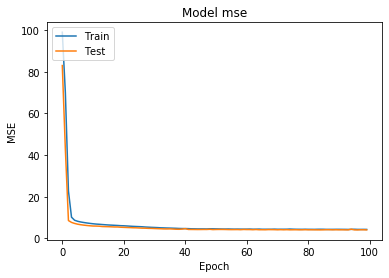

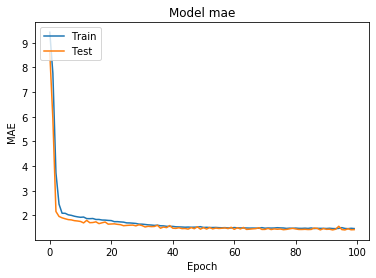

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()